# Nube de Palabras (WordCloud)
Es un gráfico sin ejes que muestra diversas palabras pertenecientes a un texto o a un grupo de textos. El tamaño de cada palabra codifica que tan "importante" es la palabra dentro del texto o de los textos. Esta "importancia" puede significar diferentes métricas: Frecuencia Absoluta, Frecuencia Relativa, TF-IDF, etc. Usualmente es el primer gráfico que se realiza como exploración a una columna de tipo texto. 

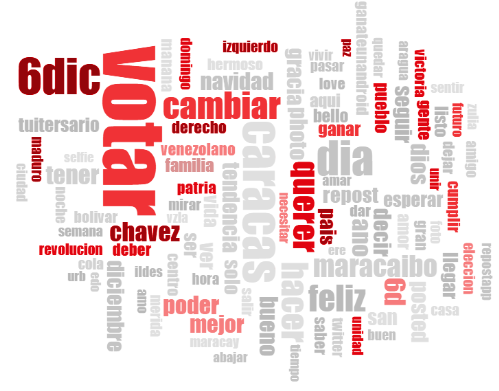

### Consejos
- Su propósito no es representar presición. Es utilizado más a modo de presentación o inspección rápida.
- Si quiero presentar con presición cuales son las palabras más "importantes" de mi texto es preferible un gráfico de barras (Eje X: cada palabra, Eje Y: medida de importancia de cada palabra).
- Puedo darle forma a mi WordCloud para hacerlo más llamativo

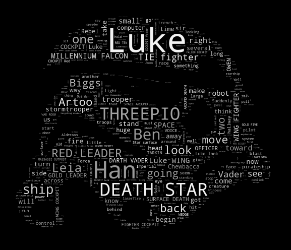

## Referencias
- https://datavizcatalogue.com/ES/metodos/nube_de_palabras.html

In [1]:
%pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_12_0_arm64.whl size=154671 sha256=5aa971da39b915b0bb4e244d3860dcbf7f097c112dd894befd8b697004d28d30
  Stored in directory: /Users/leonardokuffo/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/marcas_mensajes_twitter.csv')
df[['created_at', 'cx_brand', 'message']].tail(10)

,created_at,cx_brand,message
53504,Fri Apr 12 12:31:15 +0000 2019,Target,Thank you so much to the Hyattsville @Target s...
53505,Fri Apr 12 10:43:56 +0000 2019,Target,Just found out the album won’t be sold at my @...
53506,Sun Apr 21 13:51:57 +0000 2019,TiffanyAndCo,#Sunday is a great day to plan our next trip t...
53507,Tue Apr 16 14:15:27 +0000 2019,TiffanyAndCo,@TiffanyAndCo Just wondered if there was any d...
53508,Tue Apr 16 14:53:35 +0000 2019,BNBuzz,Why are the employees at @BNBuzz 82/Broadway a...
53509,Mon Apr 15 19:17:33 +0000 2019,BNBuzz,@BNBuzz Hello do you know if your site is expe...
53510,Mon Apr 15 00:43:22 +0000 2019,BNBuzz,Hey @BNBuzz - was disappointed today to discov...
53511,Sat Apr 13 22:50:35 +0000 2019,BNBuzz,Just called @BNBuzz to reserve my copy of #mil...
53512,Sat Apr 13 20:46:24 +0000 2019,BNBuzz,I'll never buy an ebook from @BNBuzz again. I ...
53513,Sat Apr 13 19:19:54 +0000 2019,BNBuzz,@BNBuzz terrible UX. For the life of me I cann...


In [4]:
df = df.drop_duplicates(subset=['message'])

In [5]:
texto = ' '.join(df['tokenized'])

(-0.5, 999.5, 699.5, -0.5)

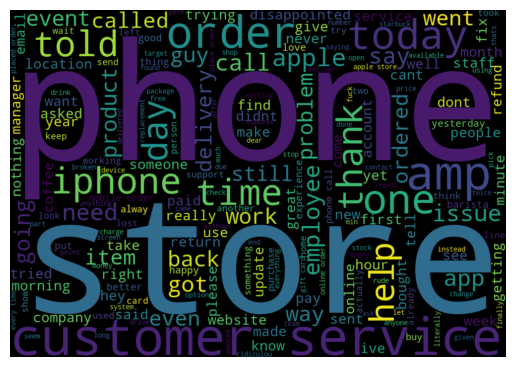

In [6]:
# Wordcloud con Matplotlib y una libreria adicional 
# https://github.com/amueller/word_cloud
wc = WordCloud(
    width=1000,
    height=700,
    margin=0,
    background_color='black' # white
).generate(texto)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [7]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from PIL import Image
import numpy as np

In [9]:
tw_color = np.array(Image.open('../data/twitter.jpeg'))
tw_mask = tw_color.copy()
tw_mask[tw_mask.sum(axis=2) == 0] = 255

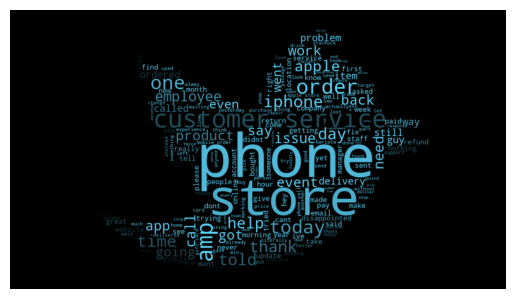

In [10]:
wc = WordCloud(
    margin=0,
    mask=tw_mask
).generate(texto)

image_colors = ImageColorGenerator(tw_color)
wc.recolor(color_func=image_colors)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file("./wc_tw.png")

## Wordclouds sin Python

También pueden generar Wordclouds con herramientas online con una interfaz grafica:
https://www.nubedepalabras.es/

Desventaja: Estas herramientas Online no soportan una cantidad grande de texto